#### Import Module

In [1]:
import os, sys
sys.path.append(os.path.abspath(os.path.dirname(os.getcwd())))

from setting import *

#### Load Data

In [2]:
data = pd.read_csv('../../selected_data/0_content/pca_512_0.csv')
data

,id,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,...,PC_504,PC_505,PC_506,PC_507,PC_508,PC_509,PC_510,PC_511,PC_512,success_x
0,NMN2,-0.130630,0.031360,0.066590,0.002335,0.124793,0.021588,-0.111104,0.045074,0.019810,...,-0.003159,-0.010444,-0.002667,0.003216,0.004376,0.008466,-0.009717,-0.008729,0.011197,1
1,ZENLET-The-Dual,-0.094357,-0.017530,-0.117980,-0.010048,-0.073846,0.011188,0.021479,-0.024168,-0.000377,...,0.022337,-0.000268,-0.029778,0.019462,-0.011441,0.050175,0.006991,-0.001825,0.002580,1
2,hhl-penzhai,-0.049825,-0.005089,0.012481,-0.015170,0.043311,-0.004456,-0.042526,-0.025738,0.068820,...,-0.013835,-0.016763,0.000599,-0.002825,0.007015,-0.001429,-0.017111,0.006092,-0.012198,1
3,scion-36,-0.063341,-0.009586,-0.043032,0.028156,0.004780,0.046390,-0.032501,-0.007282,-0.011461,...,0.005160,-0.002035,-0.014674,0.013501,-0.005865,-0.009624,0.014712,0.006781,-0.005430,1
4,amt-cube,-0.168320,0.050024,0.038610,-0.047302,-0.069063,0.048109,0.017623,-0.004422,0.091493,...,0.009770,-0.008321,0.001610,-0.024026,0.018660,0.012791,0.001901,-0.020068,-0.014070,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5607,wlm-tw,0.133633,-0.072639,0.042710,-0.028348,0.005277,-0.000074,-0.026166,-0.039220,-0.071311,...,-0.043418,-0.009207,-0.009867,-0.010451,-0.005326,-0.000865,-0.017818,-0.004070,-0.003065,0
5608,8bowchou,0.190995,-0.128841,0.116799,-0.116244,-0.002578,0.040459,0.160198,0.062759,-0.080552,...,0.003056,0.010772,0.024633,0.000717,-0.001837,0.009061,-0.009791,-0.005984,0.001282,0
5609,bananalin,0.072073,-0.059127,-0.020096,-0.003381,0.049407,0.037478,-0.051388,0.000880,-0.004135,...,-0.001892,-0.001187,0.000946,-0.000099,0.000855,-0.002385,-0.000562,0.002963,-0.000586,0
5610,fooddesignlab,0.109848,-0.074687,0.012676,-0.069559,0.004486,-0.075525,0.031191,-0.103580,0.068078,...,-0.030658,0.016202,0.014419,0.021917,-0.027279,0.004850,-0.011575,0.008506,0.011309,0


In [3]:
x_data = data.iloc[:,1:-1]
y_data = data.iloc[:,-1]
y_data.value_counts()

success_x
1    4286
0    1326
Name: count, dtype: int64

In [4]:
# Normalize
scaler = MinMaxScaler()
scaler.fit(x_data)
norm_x_data = scaler.transform(x_data)

# --- Split Data ---
norm_train_x, norm_test_x, norm_train_y, norm_test_y = train_test_split(norm_x_data, y_data, test_size=0.3, random_state=30)
train_x, test_x, train_y, test_y = train_test_split(x_data, y_data, test_size=0.3, random_state=30)

# Undersample
sampler = RandomUnderSampler()
under_train_x, under_train_y = sampler.fit_resample(train_x, train_y)

# Undersample
sampler = RandomOverSampler()
over_train_x, over_train_y = sampler.fit_resample(train_x, train_y)

#### Naive Bayes
> ref: https://scikit-learn.org/stable/modules/naive_bayes.html
* 模型選擇： Complement NB（不可使用負數，需先經過正規化）
* 使用資料：正規化後資料

---- Normalized Data ----
Accuracy: 0.64
Recall: 0.68
Precision: 0.82
F1-Score: 0.74
F0.5-Score: 0.79
F0.3-Score: 0.81


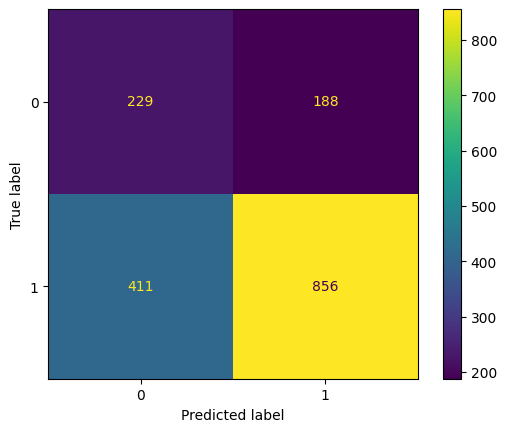

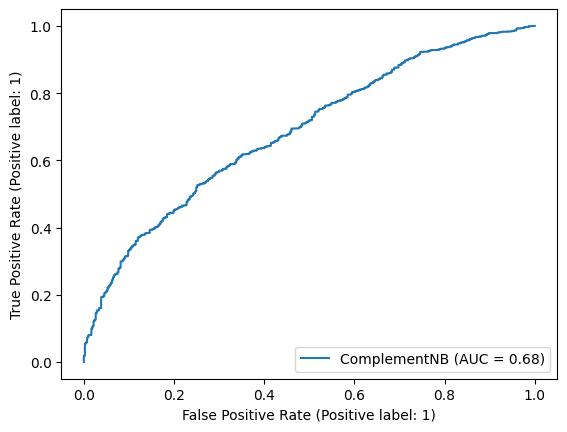

In [5]:
print('---- Normalized Data ----')

model = ComplementNB()
model.fit(norm_train_x, norm_train_y)

pred_y = model.predict(norm_test_x)

result_report(model, norm_test_x, norm_test_y, pred_y)

#### Logistic Regression
> ref: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
* 模型選擇： Logistic Regression
* 使用資料：原始資料、Resample 後的資料

---- Original Data ----
Accuracy: 0.75
Recall: 1.0
Precision: 0.76
F1-Score: 0.86
F0.5-Score: 0.79
F0.3-Score: 0.77


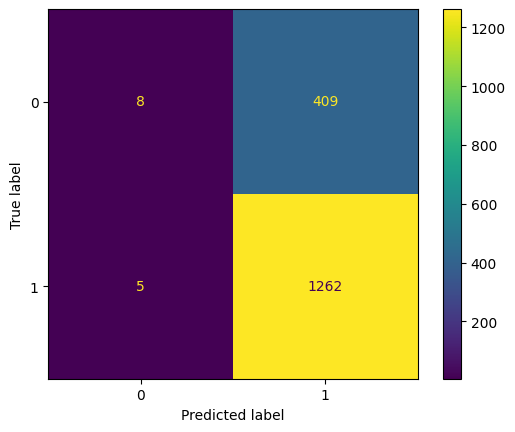

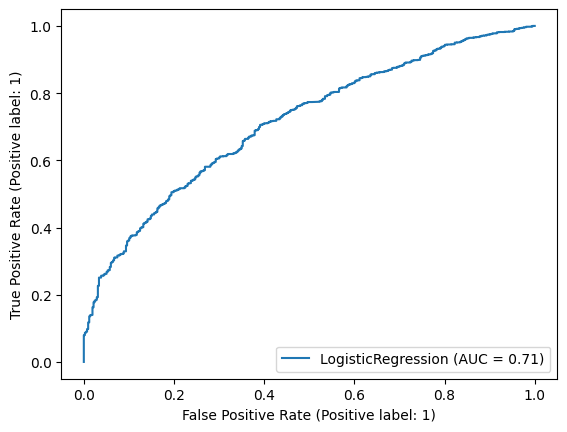

---- Under Sample Data ----
Accuracy: 0.62
Recall: 0.6
Precision: 0.85
F1-Score: 0.71
F0.5-Score: 0.79
F0.3-Score: 0.82


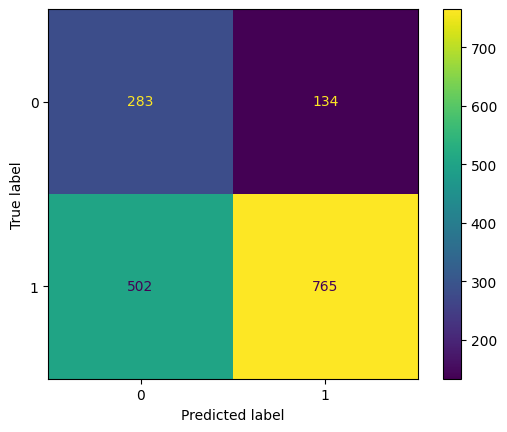

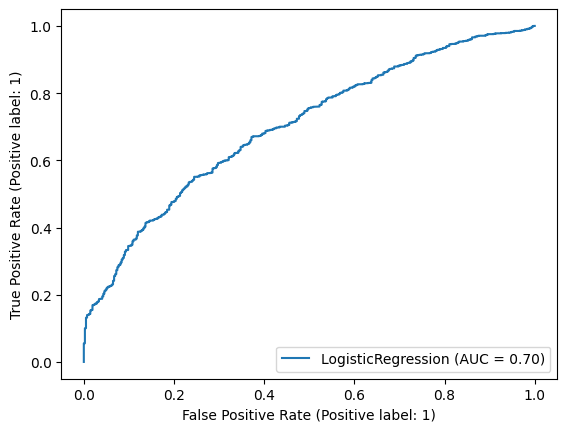

---- Over Sample Data ----
Accuracy: 0.67
Recall: 0.69
Precision: 0.84
F1-Score: 0.76
F0.5-Score: 0.81
F0.3-Score: 0.83


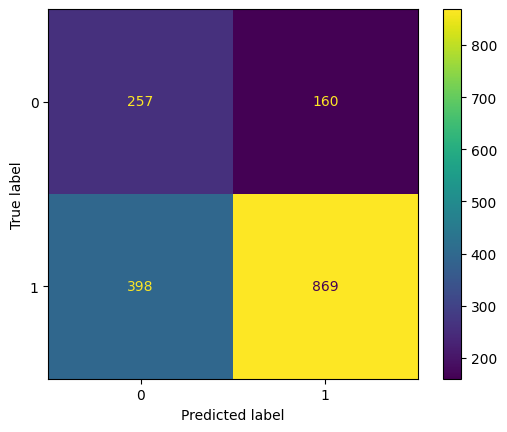

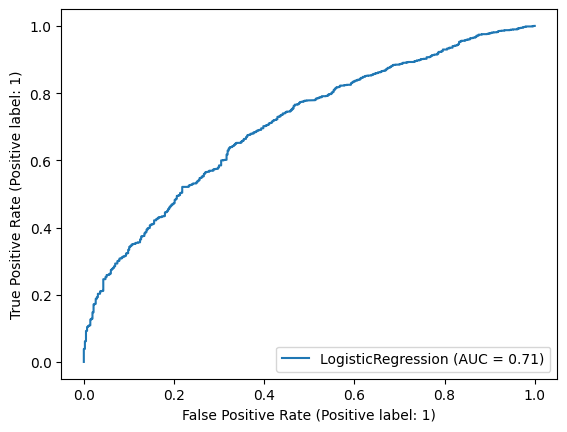

In [6]:
print('---- Original Data ----')
model = LogisticRegression()
model.fit(train_x, train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)


print('---- Under Sample Data ----')
model = LogisticRegression()
model.fit(under_train_x, under_train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)

print('---- Over Sample Data ----')
model = LogisticRegression()
model.fit(over_train_x, over_train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)

#### SVM
> ref: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
* 模型選擇：SVC
* 使用資料：原始資料、Resample 後的資料

---- Original Data ----
Accuracy: 0.75
Recall: 0.99
Precision: 0.76
F1-Score: 0.86
F0.5-Score: 0.79
F0.3-Score: 0.77


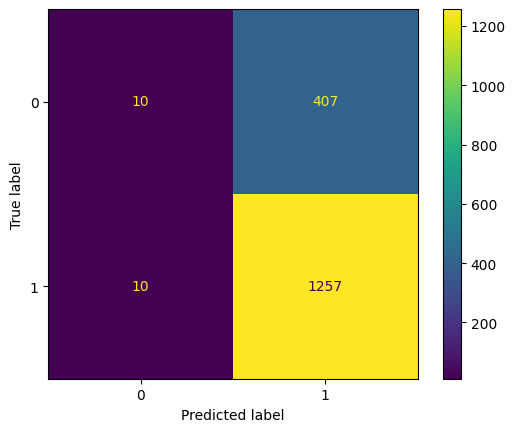

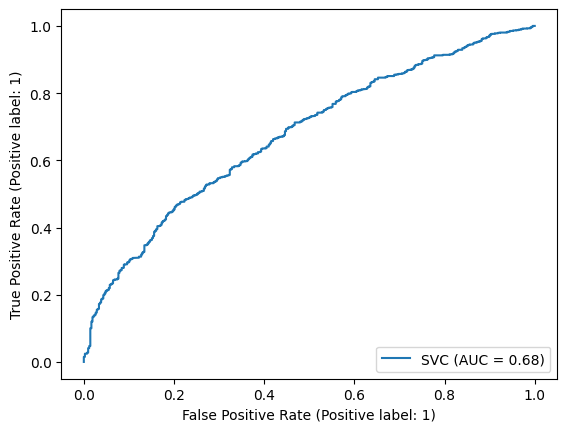

---- Under Sample Data ----
Accuracy: 0.63
Recall: 0.64
Precision: 0.83
F1-Score: 0.72
F0.5-Score: 0.78
F0.3-Score: 0.81


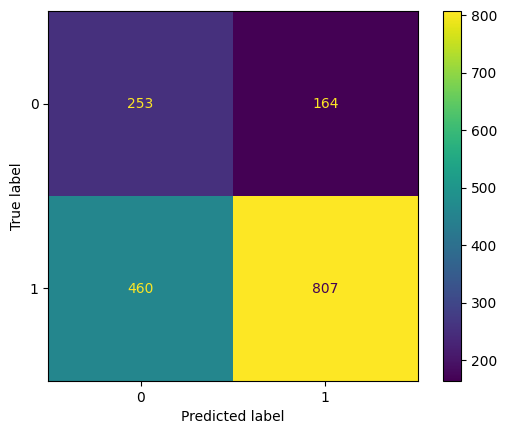

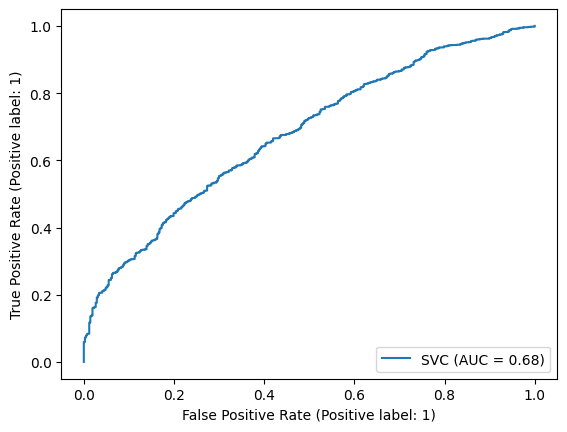

---- Over Sample Data ----
Accuracy: 0.71
Recall: 0.83
Precision: 0.8
F1-Score: 0.81
F0.5-Score: 0.8
F0.3-Score: 0.8


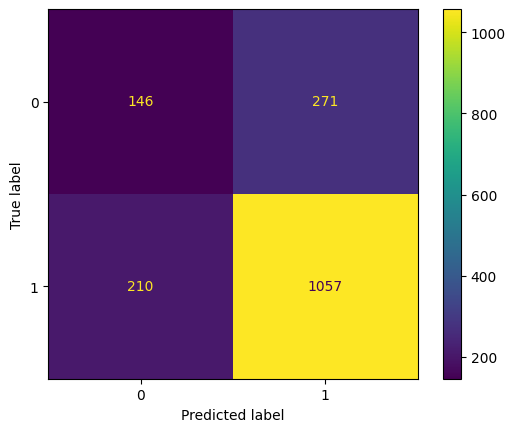

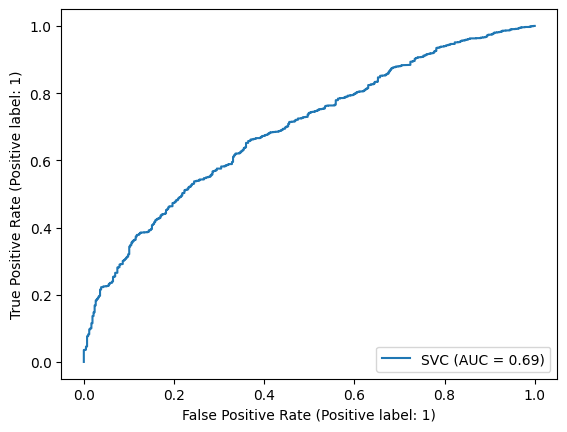

In [7]:
print('---- Original Data ----')
model = SVC()
model.fit(train_x, train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)


print('---- Under Sample Data ----')
model = SVC()
model.fit(under_train_x, under_train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)

print('---- Over Sample Data ----')
model = SVC()
model.fit(over_train_x, over_train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)

#### Random Forest

> ref: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
* 模型選擇： Random Forest
* 使用資料：原始資料、Resample 後的資料

---- Original Data ----
Accuracy: 0.75
Recall: 0.99
Precision: 0.75
F1-Score: 0.86
F0.5-Score: 0.79
F0.3-Score: 0.77


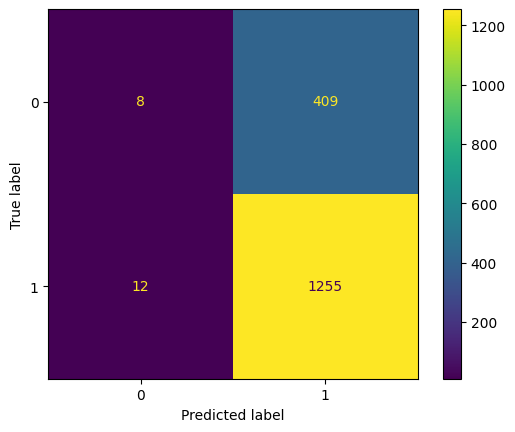

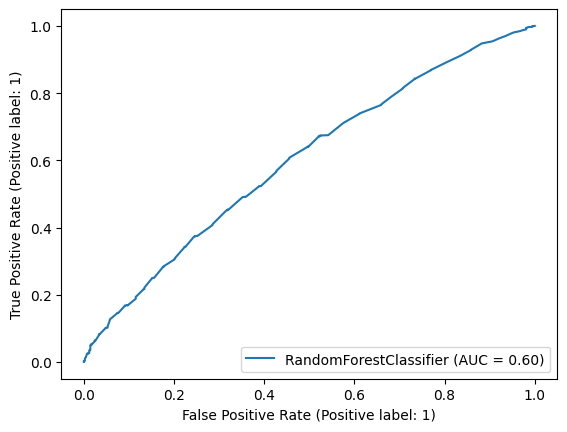

---- Under Sample Data ----
Accuracy: 0.54
Recall: 0.52
Precision: 0.8
F1-Score: 0.63
F0.5-Score: 0.73
F0.3-Score: 0.77


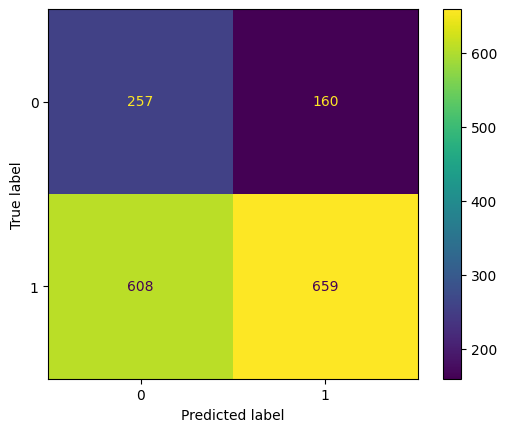

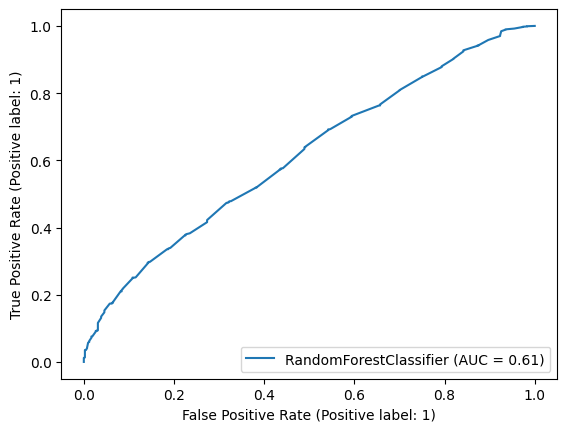

---- Over Sample Data ----
Accuracy: 0.76
Recall: 1.0
Precision: 0.76
F1-Score: 0.86
F0.5-Score: 0.79
F0.3-Score: 0.77


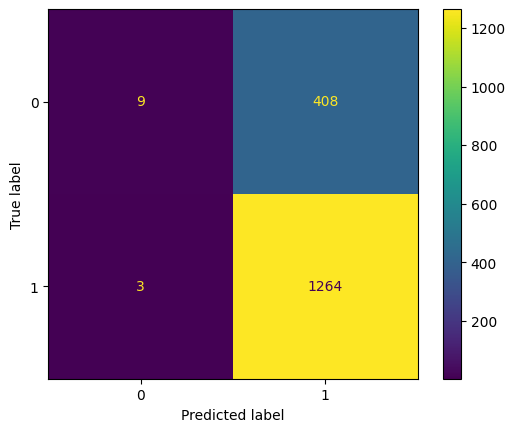

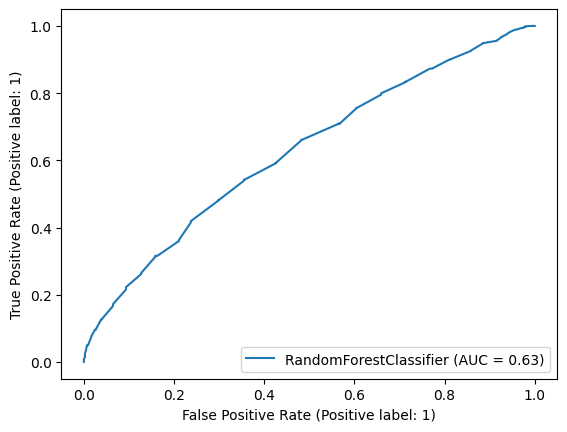

In [8]:
print('---- Original Data ----')
model = RandomForestClassifier()
model.fit(train_x, train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)

print('---- Under Sample Data ----')
model = RandomForestClassifier()
model.fit(under_train_x, under_train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)

print('---- Over Sample Data ----')
model = RandomForestClassifier()
model.fit(over_train_x, over_train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)

#### XGBoost
> ref: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
* 選擇模型：GradientBoostingClassifier
* 使用資料：原始資料、Resample 後的資料

---- Original Data ----
Accuracy: 0.75
Recall: 0.99
Precision: 0.75
F1-Score: 0.85
F0.5-Score: 0.79
F0.3-Score: 0.77


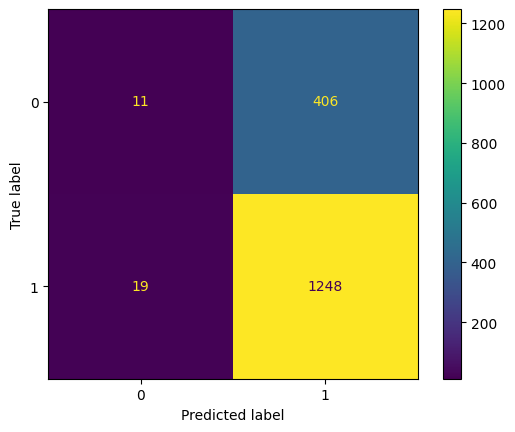

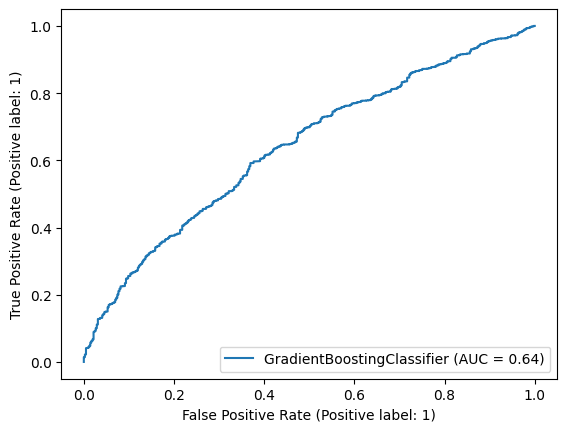

---- Under Sample Data ----
Accuracy: 0.58
Recall: 0.58
Precision: 0.8
F1-Score: 0.68
F0.5-Score: 0.75
F0.3-Score: 0.78


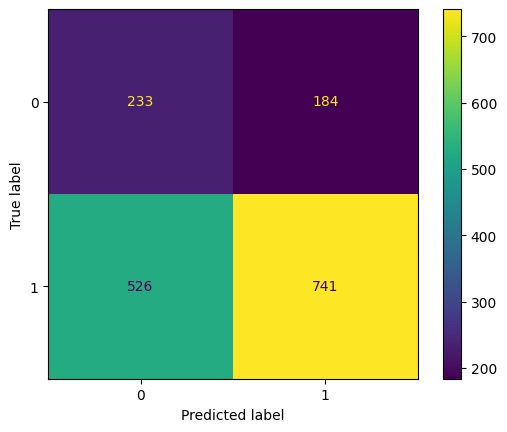

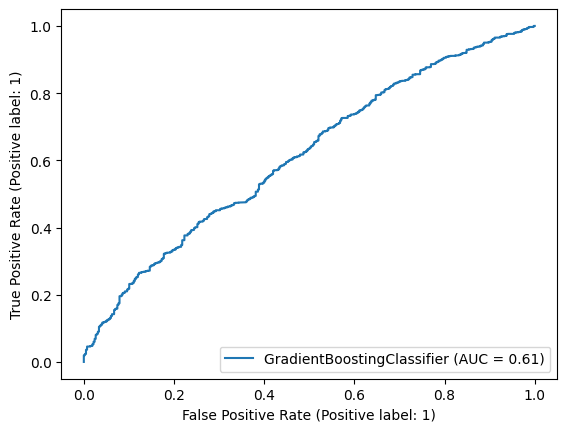

---- Over Sample Data ----
Accuracy: 0.69
Recall: 0.8
Precision: 0.79
F1-Score: 0.8
F0.5-Score: 0.8
F0.3-Score: 0.79


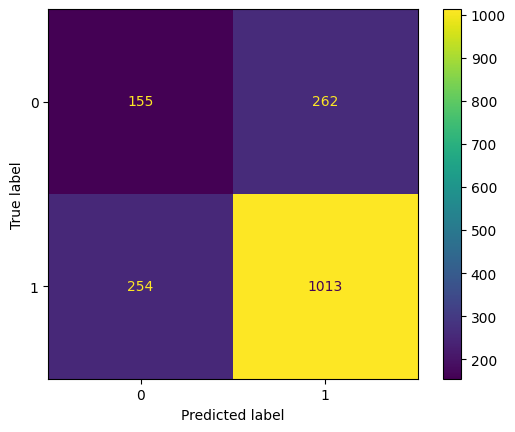

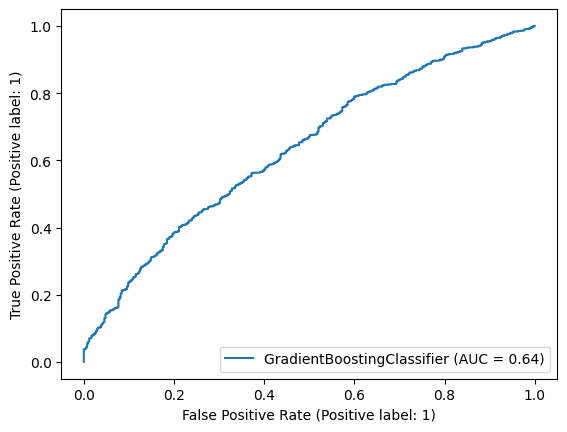

In [9]:
print('---- Original Data ----')
model = GradientBoostingClassifier()
model.fit(train_x, train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)

print('---- Under Sample Data ----')
model = GradientBoostingClassifier()
model.fit(under_train_x, under_train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)

print('---- Over Sample Data ----')
model = GradientBoostingClassifier()
model.fit(over_train_x, over_train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)
